#### Overview

위경도 정보가 포함된 CSV파일을 geometry의 하나인 Point 공간데이터로 변경

#### Import Libraries

In [3]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# High-Resolution Graph Output option for Retina Displays
%config InlineBackend.figure_format = 'retina'

#### Fetching Data
* 공공데이터포털에 있는 `전국도서관표준데이터`

In [5]:
FILE_PATH = os.path.join(os.getcwd(), '89_data', 'standard-libraries.csv')
lib_df = pd.read_csv(FILE_PATH)
lib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   도서관명        3629 non-null   object 
 1   시도명         3629 non-null   object 
 2   시군구명        3629 non-null   object 
 3   도서관유형       3629 non-null   object 
 4   휴관일         3629 non-null   object 
 5   평일운영시작시각    3629 non-null   object 
 6   평일운영종료시각    3629 non-null   object 
 7   토요일운영시작시각   3629 non-null   object 
 8   토요일운영종료시각   3629 non-null   object 
 9   공휴일운영시작시각   3629 non-null   object 
 10  공휴일운영종료시각   3629 non-null   object 
 11  열람좌석수       3629 non-null   int64  
 12  자료수(도서)     3629 non-null   int64  
 13  자료수(연속간행물)  3629 non-null   int64  
 14  자료수(비도서)    3629 non-null   int64  
 15  대출가능권수      3629 non-null   int64  
 16  대출가능일수      3629 non-null   int64  
 17  소재지도로명주소    3629 non-null   object 
 18  운영기관명       2961 non-null   object 
 19  도서관전화번호     3396 non-null  

#### Extracting Specific District Names

In [11]:
DISTRICT_NAME = '남양주시'

In [12]:
lib_df_nam = lib_df[lib_df.시군구명==DISTRICT_NAME]
lib_df_nam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 32
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   도서관명        13 non-null     object 
 1   시도명         13 non-null     object 
 2   시군구명        13 non-null     object 
 3   도서관유형       13 non-null     object 
 4   휴관일         13 non-null     object 
 5   평일운영시작시각    13 non-null     object 
 6   평일운영종료시각    13 non-null     object 
 7   토요일운영시작시각   13 non-null     object 
 8   토요일운영종료시각   13 non-null     object 
 9   공휴일운영시작시각   13 non-null     object 
 10  공휴일운영종료시각   13 non-null     object 
 11  열람좌석수       13 non-null     int64  
 12  자료수(도서)     13 non-null     int64  
 13  자료수(연속간행물)  13 non-null     int64  
 14  자료수(비도서)    13 non-null     int64  
 15  대출가능권수      13 non-null     int64  
 16  대출가능일수      13 non-null     int64  
 17  소재지도로명주소    13 non-null     object 
 18  운영기관명       13 non-null     object 
 19  도서관전화번호     13 non-null     object 


In [13]:
lib_df_nam.head()

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,운영기관명,도서관전화번호,부지면적,건물면적,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,이석영뉴미디어도서관,경기도,남양주시,공공도서관,둘째·넷째 금요일+1월 1일+설날·추석 연휴(대체공휴일 포함),09:00,22:00,09:00,18:00,09:00,...,사단법인 문화현상,031-595-8390,1843.0,4877.0,http://lib.nyj.go.kr/lsy,37.658160,127.299532,2023-04-30,3990000,경기도 남양주시
20,정약용도서관,경기도,남양주시,공공도서관,첫째·셋째 금요일+1월 1일+설날·추석 연휴(대체공휴일 포함),09:00,22:00,09:00,18:00,09:00,...,경기도 남양주시청,031-590-2587,21501.0,12807.0,http://lib.nyj.go.kr/jyy,37.612158,127.167357,2023-04-30,3990000,경기도 남양주시
21,와부도서관,경기도,남양주시,공공도서관,둘째·넷째 금요일+1월 1일+설날·추석 연휴(대체공휴일 포함),09:00,22:00,09:00,22:00,09:00,...,경기도 남양주시청,031-590-8920,3920.0,4010.0,http://lib.nyj.go.kr/waboo,37.585685,127.217498,2023-04-30,3990000,경기도 남양주시
22,화도도서관,경기도,남양주시,공공도서관,첫째·셋째 금요일+1월 1일+설날·추석 연휴(대체공휴일 포함),09:00,22:00,09:00,22:00,09:00,...,경기도 남양주시청,031-590-4587,596.0,2667.0,http://lib.nyj.go.kr/hwado,37.650137,127.305815,2023-04-30,3990000,경기도 남양주시
23,진건도서관,경기도,남양주시,공공도서관,둘째·넷째 금요일+1월 1일+설날·추석 연휴(대체공휴일 포함),09:00,22:00,09:00,22:00,09:00,...,경기도 남양주시청,031-590-8260,1322.0,2848.0,http://lib.nyj.go.kr/jingeon,37.655136,127.177439,2023-04-30,3990000,경기도 남양주시


In [14]:
lib_df_nam['위도'].unique().size

13

#### (x,y):CSV to Geometry info

In [15]:
geometry = gpd.points_from_xy(lib_df_nam.경도, lib_df_nam.위도)

In [16]:
geometry

<GeometryArray>
[  <POINT (127.3 37.658)>, <POINT (127.167 37.612)>, <POINT (127.217 37.586)>,
  <POINT (127.306 37.65)>, <POINT (127.177 37.655)>, <POINT (127.239 37.642)>,
 <POINT (127.248 37.668)>, <POINT (127.118 37.708)>,  <POINT (127.194 37.73)>,
 <POINT (127.193 37.716)>, <POINT (127.198 37.698)>, <POINT (127.145 37.649)>,
  <POINT (127.12 37.651)>]
Length: 13, dtype: geometry

In [17]:
lib_gdf = gpd.GeoDataFrame(lib_df_nam, geometry=geometry, crs='epsg:4326')
lib_gdf.info()
# 마지막에 `geometry` 컬럼 추가

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 13 entries, 0 to 32
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   도서관명        13 non-null     object  
 1   시도명         13 non-null     object  
 2   시군구명        13 non-null     object  
 3   도서관유형       13 non-null     object  
 4   휴관일         13 non-null     object  
 5   평일운영시작시각    13 non-null     object  
 6   평일운영종료시각    13 non-null     object  
 7   토요일운영시작시각   13 non-null     object  
 8   토요일운영종료시각   13 non-null     object  
 9   공휴일운영시작시각   13 non-null     object  
 10  공휴일운영종료시각   13 non-null     object  
 11  열람좌석수       13 non-null     int64   
 12  자료수(도서)     13 non-null     int64   
 13  자료수(연속간행물)  13 non-null     int64   
 14  자료수(비도서)    13 non-null     int64   
 15  대출가능권수      13 non-null     int64   
 16  대출가능일수      13 non-null     int64   
 17  소재지도로명주소    13 non-null     object  
 18  운영기관명       13 non-null     object  
 19  도서관전화번호

In [18]:
lib_gdf_small = lib_gdf[['도서관명', '도서관유형', '열람좌석수', '건물면적', 'geometry']]
lib_gdf_small.head()

,도서관명,도서관유형,열람좌석수,건물면적,geometry
0,이석영뉴미디어도서관,공공도서관,615,4877.0,POINT (127.29953 37.65816)
20,정약용도서관,공공도서관,560,12807.0,POINT (127.16736 37.61216)
21,와부도서관,공공도서관,430,4010.0,POINT (127.21750 37.58569)
22,화도도서관,공공도서관,328,2667.0,POINT (127.30581 37.65014)
23,진건도서관,공공도서관,263,2848.0,POINT (127.17744 37.65514)


In [19]:
lib_gdf_small.columns = ['name', 'type', 'chair_cnt', 'bd_area', 'geometry']
lib_gdf_small.head()

,name,type,chair_cnt,bd_area,geometry
0,이석영뉴미디어도서관,공공도서관,615,4877.0,POINT (127.29953 37.65816)
20,정약용도서관,공공도서관,560,12807.0,POINT (127.16736 37.61216)
21,와부도서관,공공도서관,430,4010.0,POINT (127.21750 37.58569)
22,화도도서관,공공도서관,328,2667.0,POINT (127.30581 37.65014)
23,진건도서관,공공도서관,263,2848.0,POINT (127.17744 37.65514)


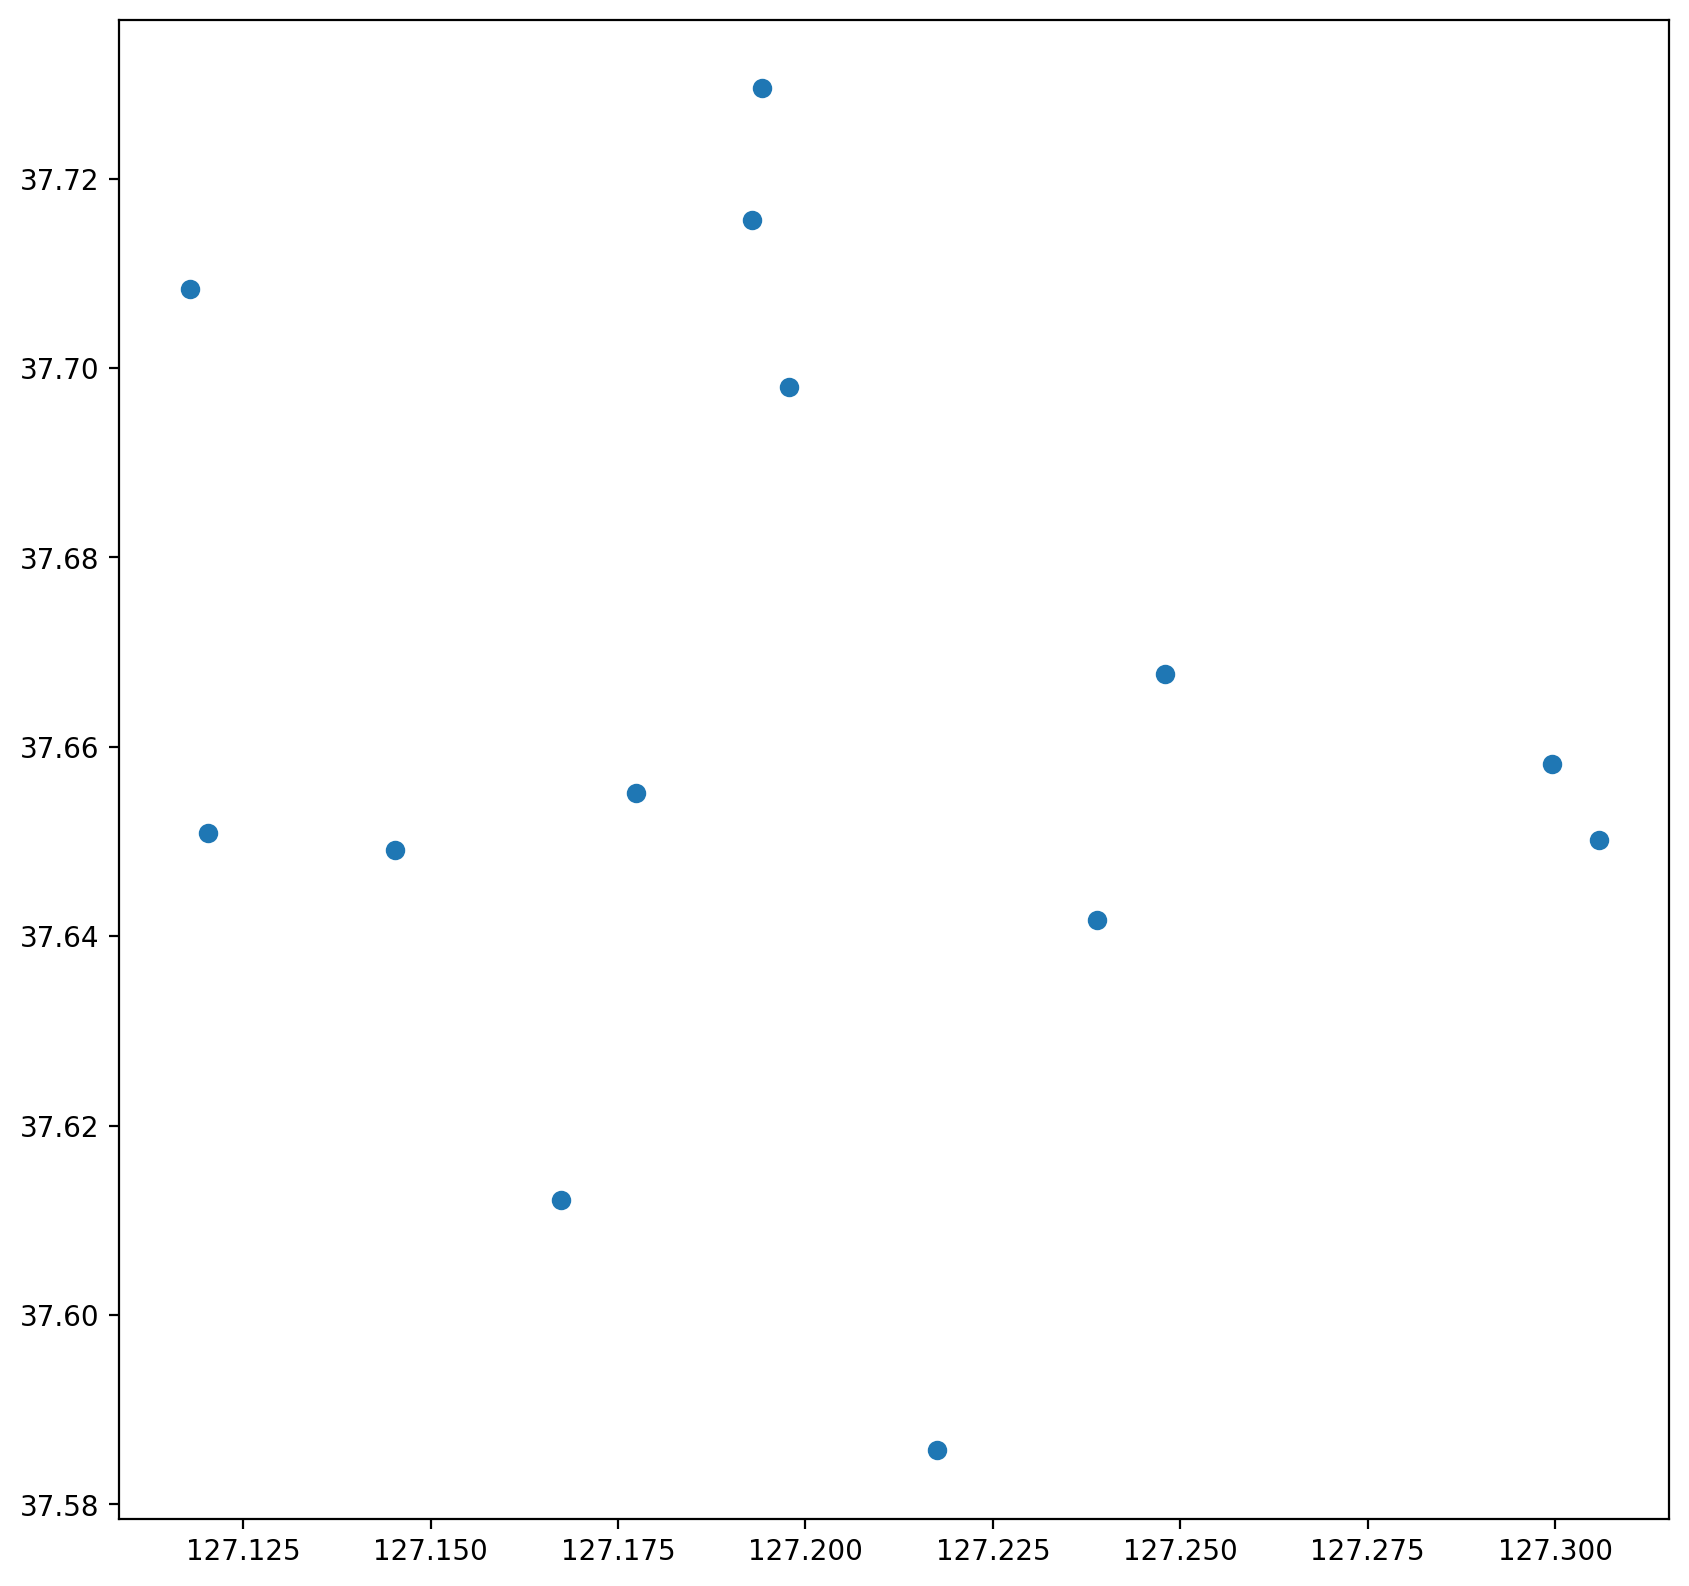

In [20]:
lib_gdf_small.plot(figsize=(10,10))
plt.show()